## EDA(Exploratory Data Analysis)

1. load the dataset
2. clean data(missing values,duplicates,types)
3. treat outliers
4. Univariate and bivariate and multivariate analysis
5. Insights

Outlier : A data point that is significantly different from other observations in a dataset

How outliers will come   ?
1. Measurement errors
2. data entry mistakes

Why they are important  ?
1. They can be errors
2. They effect the data analysis

How to identify the outliers    ?
1. Statistical methods

------>Inter quartile range(IQR)

------>Z-Score

2. Visualization methods

----->Scatter plots

----->Box plots

----->Histograms

##### Univariate Analysis

The method that analyses a single variable to describe its characteristics ,finding patterns and summarize the data.
It involves only one variable

##### Bivariate analysis

It will give the relationship between 2 variables.It helps to discover if there is a correlation,association or connection between 2 variables

It involves 2 variables(x & y)

##### Multivariate Analysis

To understand how multiple factors interact and influence eachother

It involves more than 2 

Example-
How our age,income,and education level together influence the purchasing the behavior

### ETL


### ELT


## EDA : <Dataset>

1. Load & Overview
2. Cleaning (missing,dupes,dtypes)
3. Uni, Bi & multi analysis
4. Outlier-IQR
5. Feature Engineering
6. Key Insights

##### Feature Engineering :
 Feature engineering is the process of turning raw data into useful features that helps to improve the performance of machine learning models

#1. Load libraries & datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=sns.load_dataset("Titanic")

In [4]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
#Basic information and overview
print("Shape of dataset ",df.shape)
print("\nInfo of dataset:",df.info())
print(df.describe())

Shape of dataset  (891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB

Info of dataset: None
         survived      pclass         age       sibsp     

In [7]:
#missing values analysis
missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing percentage':df.isnull().sum()/len(df)*100
})
missing.sort_values(by='missing percentage',ascending=False)

,missing_count,missing percentage
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
sex,0,0.000000
pclass,0,0.000000
survived,0,0.000000
fare,0,0.000000
parch,0,0.000000
sibsp,0,0.000000


In [10]:
#duplicates and data  type check
print("duplicates rows:",df.duplicated().sum())

#convert some columns into category type
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')

df.info()

duplicates rows: 107
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    object  
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(4), object(4)
memory usage: 74.5+ KB


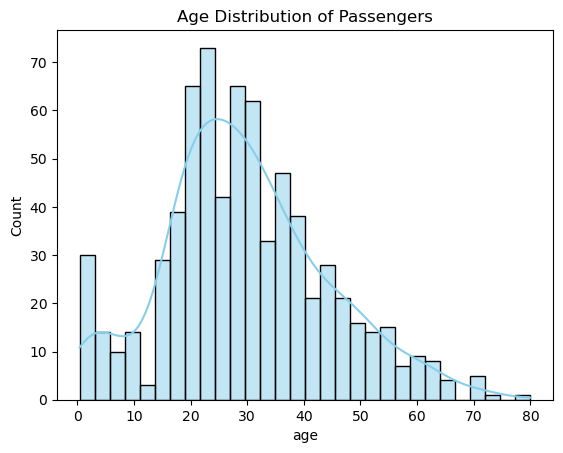

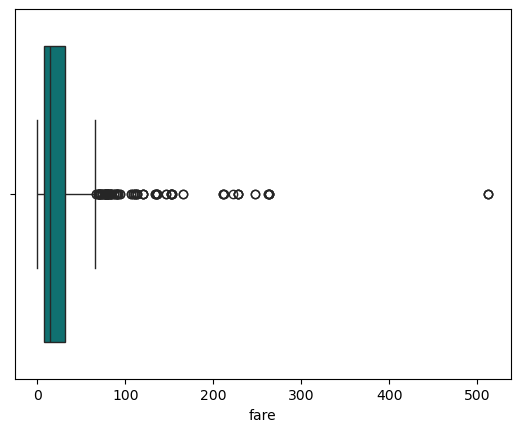

In [14]:
#6 Univariate analysis-Numerical Features
nums_cols=df.select_dtypes(include=['float64','int64']).columns
df[nums_cols].describe()

sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title("Age Distribution of Passengers")
plt.show()

#Box plot: Fare
sns.boxplot(x=df['fare'],color="teal")
plt.show()

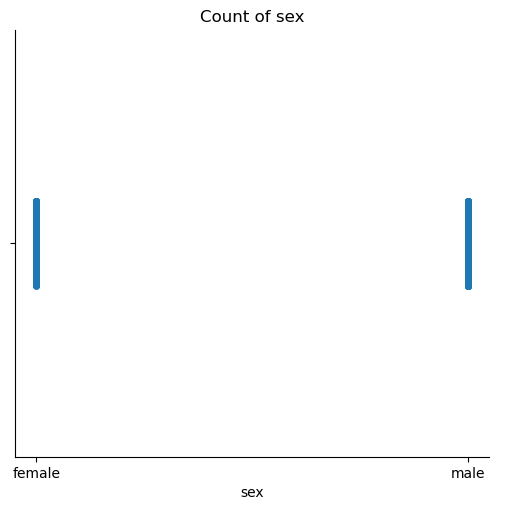

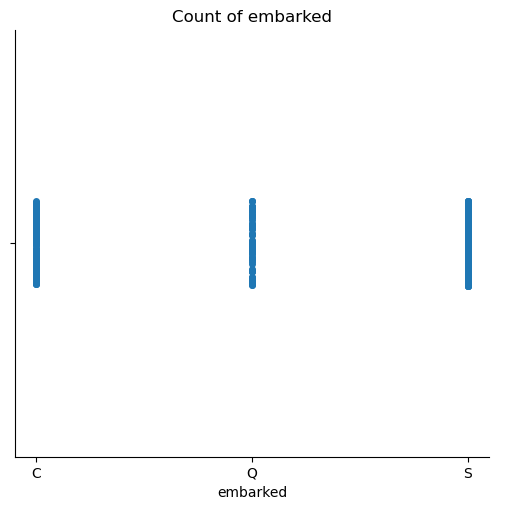

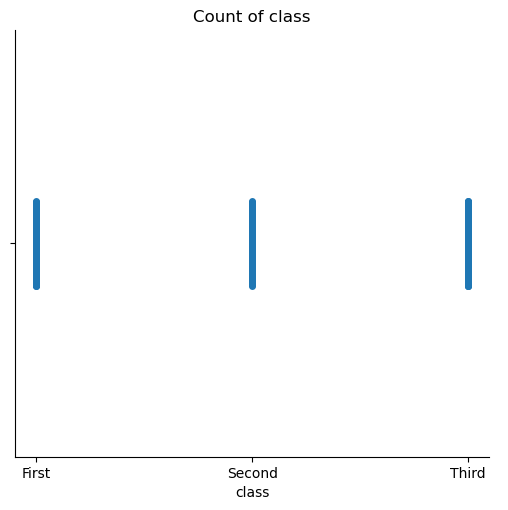

In [16]:
# Univariate Analysis -Categorical Features

cat_cols=df.select_dtypes('category').columns
for col in cat_cols:
    sns.catplot(x=col,data=df)
    plt.title(f"Count of {col}")
    plt.show()

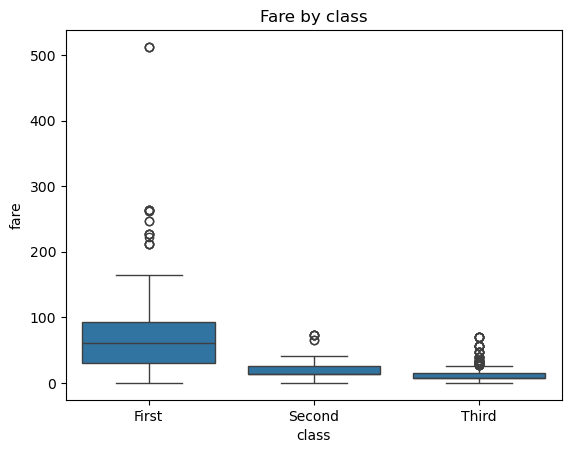

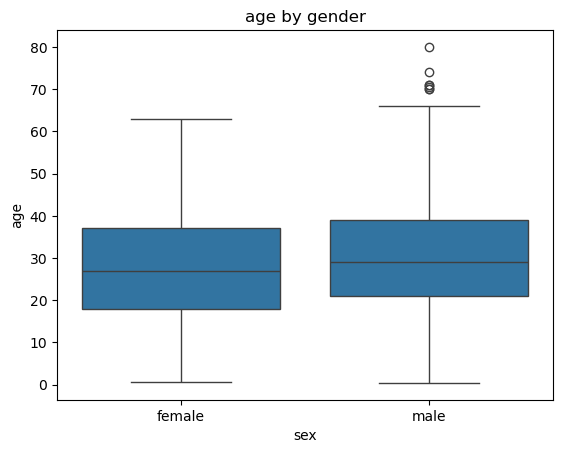

In [34]:
sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by class")
plt.show()

sns.boxplot(x='sex',y='age',data=df)
plt.title("age by gender")
plt.show()

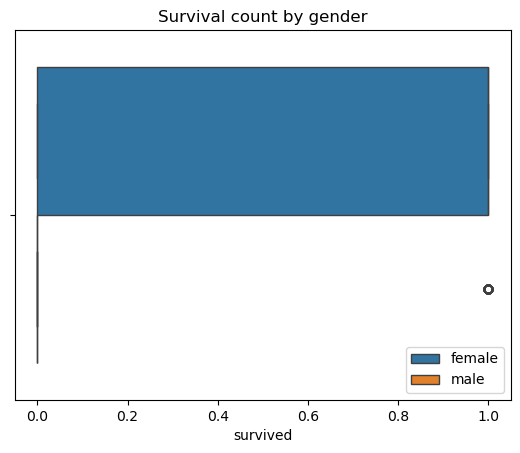

In [20]:
sns.boxplot(x='survived',hue='sex',data=df)
plt.title("Survival count by gender")
plt.legend()
plt.show()


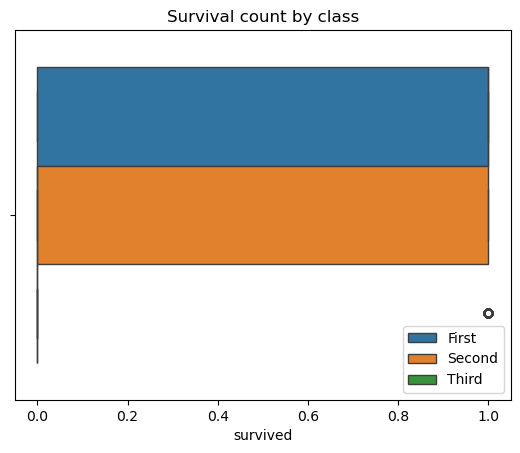

In [30]:

sns.boxplot(x='survived',hue='class',data=df)
plt.title("Survival count by class")
plt.legend()
plt.show()

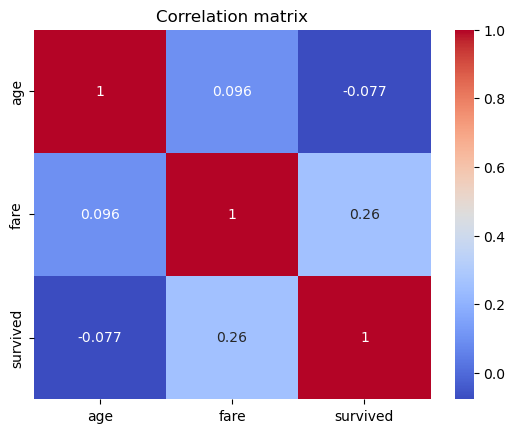

In [33]:
#Correlation and 

corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

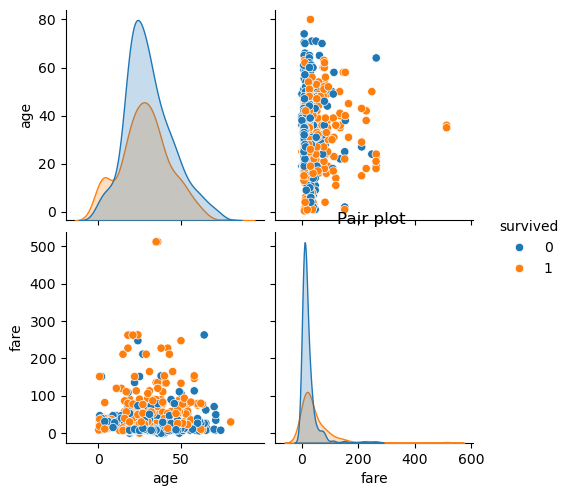

In [29]:
sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.title("Pair plot ")
plt.show()

Insights:
1. Fare has a positive correlation with survival
2. Age shows a slight negative correlation with survival

Number of outliers in fare : 116


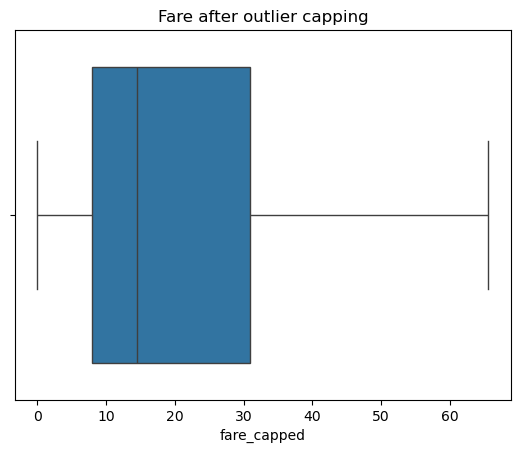

In [35]:
#Outlier detection using IQR
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1

lower =Q1-1.5 *IQR
upper=Q3+1.5 * IQR

outliers=df[(df['fare']<lower)|(df['fare']>upper)]
print("Number of outliers in fare :",len(outliers))

#outliers
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("Fare after outlier capping")
plt.show()

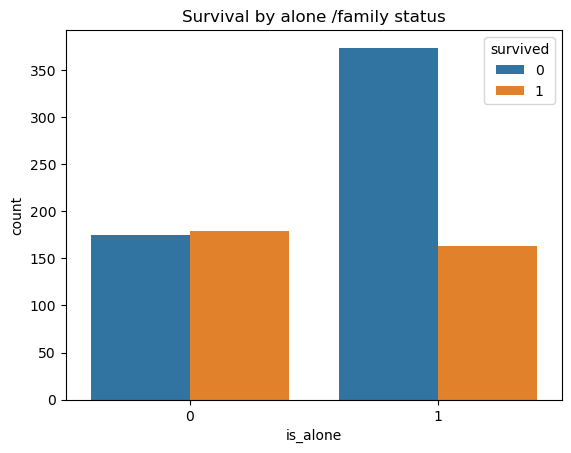

,family_size,is_alone,survived
0,2,0,0
1,2,0,1
2,1,1,1
3,2,0,1
4,1,1,0


In [38]:
#Feature engineering

#create new features
df['family_size']=df['sibsp']+df['parch']+1
df['is_alone']=(df['family_size']==1).astype(int)

sns.countplot(x='is_alone',hue='survived',data=df)
plt.title("Survival by alone /family status")
plt.show()

df[['family_size','is_alone','survived']].head()

In [ ]:
#Export the cleaned data
df.to_csv("Titanic_cleaned.csv",index=False)
print("\n Cleaned Titanic data saved as titanic_cleaned.csv")



 Cleaned Titanic data saved as titanic_cleaned.csv


In [40]:
import os 
print(os.getcwd())

c:\Users\91934\OneDrive\Desktop\AI&DS-Tekworks\Data_Analysis
